# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### **Load and Explore the Dataset**

In [ ]:
ExamDF = pd.read_csv('exam_scores_v2.csv')

In [ ]:
ExamDF.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
ExamDF.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
ExamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
ExamDF.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Dataset Visualization**

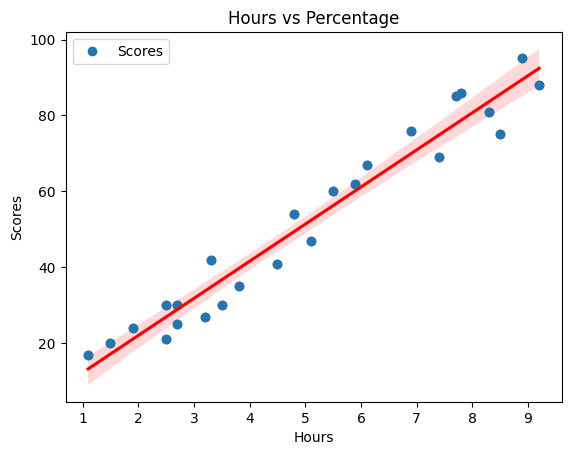

In [ ]:
ExamDF.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
sns.regplot(x='Hours', y='Scores', data=ExamDF, color='red')
plt.show()

### **Data Preparation**

In [ ]:
X = ExamDF.iloc[:, :-1].values
y = ExamDF.iloc[:, 1].values

In [ ]:
print("X:")
print(X)
print("\ny:")
print(y)

X:
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

y:
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
X = ExamDF[['Hours']]
y = ExamDF['Scores']

## **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

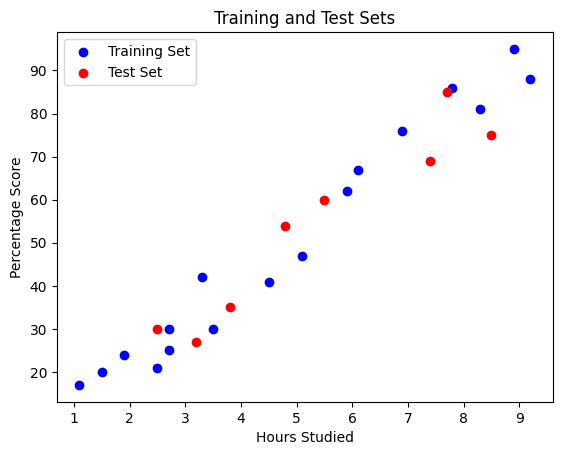

In [ ]:
plt.scatter(X_train, y_train, label='Training Set', color='blue')
plt.scatter(X_test, y_test, label='Test Set', color='red')

plt.title('Training and Test Sets')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

## **Training the Model**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## **Testing the Model (Making Predictions)**

In [ ]:
print(regressor.intercept_)

2.1024930747922284


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

    Actual  Predicted
16      30  27.018782
10      85  78.844662
22      35  39.975252
19      69  75.854708
7       60  56.918328
21      54  49.941767
2       27  33.995343
3       75  86.817875


In [ ]:
predictions = regressor.predict(X_test)

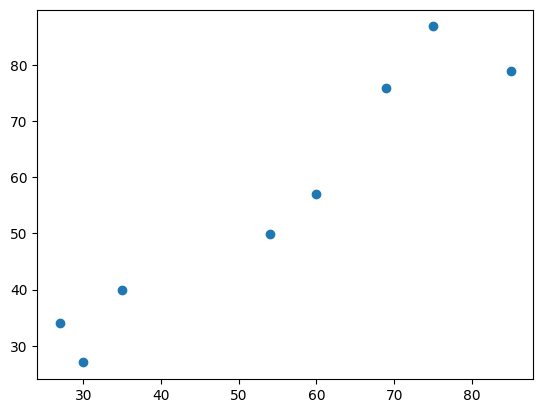

In [ ]:
plt.scatter(y_test,predictions)

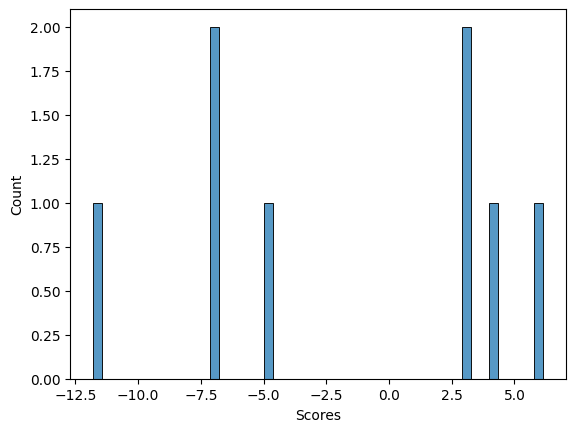

In [ ]:
sns.histplot((y_test-predictions),bins=50);

## **Analyzing the Results**

In [ ]:
intercept = regressor.intercept_
print("Intercept:", intercept)

coefficients = regressor.coef_
print("Coefficients:", coefficients)

Intercept: 2.1024930747922284
Coefficients: [9.96651548]


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Hours,9.966515


## **Evaluate the Model**

In [ ]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.8999124290533055


## **Evaluate the Model**

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


## **Change your test-train ratio to 80:20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
y_pred = regressor.predict(X_test)
predictions = regressor.predict(X_test)

In [ ]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.940259149818778


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.809637453958785
MSE: 25.60253875366451
RMSE: 5.05989513267464
